# (MBTI 별 Data 모으기: 생략) MBTI file 불러오기

In [278]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from collections import Counter

In [279]:
mbti=pd.read_csv('.\data\\training\\mbti.csv')

# Tokenize and Stemming


In [280]:
X_data = mbti['posts'].ravel()
y_data = mbti['type'].ravel()

print("normalize 시작")
normalized_text = []
for sentence in X_data: #for sentence in X_data.ravel()
    rm_urls = re.sub(r'http[s]?://\S+', '', sentence)
    clean_sentence = re.sub('[^A-Za-z\s]+', '', rm_urls.lower())
    normalized_text.append(clean_sentence)
X_data = normalized_text
print("normalize 완료")

normalize 시작
normalize 완료


In [281]:
import nltk
import numpy as np
from nltk import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils



In [282]:
ps=PorterStemmer()

stop_words = set(stopwords.words('english'))

print("stemming 시작")
stemData=[]
for sentence in X_data:
    tokenData = nltk.word_tokenize(sentence)
    tempData = []
    for word in tokenData:
        if word not in stop_words:
            tempData.append(ps.stem(word))
    stemData.append(tempData)
print("stemming 완료")
stemData = np.array(stemData)


stemming 시작
stemming 완료


In [283]:
max_features = 35000

tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(stemData)
X = tokenizer.texts_to_sequences(stemData)

max_seq_length = np.max([len(text) for text in stemData])
print(max_seq_length)
X = pad_sequences(X)

print(nb_features)
print(X.shape)
print(X)


950
10000
(8675, 907)
[[   0    0    0 ...   60   63   22]
 [   0    0    0 ...  293  202    6]
 [   0    0    0 ...   33  559  591]
 ...
 [   0    0    0 ...  375   90  148]
 [   0    0    0 ... 1827  334 1455]
 [   0    0    0 ...  126   45   49]]


In [284]:
lb = LabelEncoder()
y = np.array(y_data)
y = lb.fit_transform(y)
y = np_utils.to_categorical(y)

print(y)
print(y.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
(8675, 16)


# Data balancing 

In [285]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from collections import Counter

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

print(y.shape)
X_resampled, y_resampled = SMOTE(random_state=0).fit_sample(X, y)
#format(Counter(y_resampled))
print(y_resampled.shape)



(8675, 16)
(29312, 16)


# Garbage Collection 1

In [286]:
import gc

'''del [[mbti]]

del sentence

del [[dataCombine]]

del [condition]

for ownsentence in allData:
    del ownsentence
del allData

for tokenData in tokenizedData:   # delete 'stemData'
    for data in tokenData:
        del data
    del tokenData
del tokenizedData

for clean_sentence in normalized_text:
    del clean_sentence
del normalized_text

del X_data

del tokenData
del tempData

del sentence

gc.collect()'''

"del [[mbti]]\n\ndel sentence\n\ndel [[dataCombine]]\n\ndel [condition]\n\nfor ownsentence in allData:\n    del ownsentence\ndel allData\n\nfor tokenData in tokenizedData:   # delete 'stemData'\n    for data in tokenData:\n        del data\n    del tokenData\ndel tokenizedData\n\nfor clean_sentence in normalized_text:\n    del clean_sentence\ndel normalized_text\n\ndel X_data\n\ndel tokenData\ndel tempData\n\ndel sentence\n\ngc.collect()"

In [287]:
import tensorflow as tf
from keras.utils import np_utils
from tensorflow import keras

from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size= 0.3, random_state=1234)

#n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]

print(X_train.shape)
print(y_train.shape)

X_train = np.expand_dims(X_train, 2)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)
print(X_train.shape[1])

model = Sequential()
model.add(Embedding(max_features, 128))
#model.add(Embedding(max_features, 128, max_seq_length))
model.add(LSTM(128, batch_input_shape=(None, X_train.shape[1])))
model.add(Dense(16, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

(20518, 907)
(20518, 16)
(20518, 907, 1)
907
Epoch 1/5
642/642 [==============================] - 442s 689ms/step - loss: 2.6653 - accuracy: 0.1124 - val_loss: 2.6452 - val_accuracy: 0.1317
Epoch 2/5
642/642 [==============================] - 423s 659ms/step - loss: 2.4529 - accuracy: 0.1901 - val_loss: 2.6592 - val_accuracy: 0.1373
Epoch 3/5
642/642 [==============================] - 414s 646ms/step - loss: 2.0613 - accuracy: 0.3418 - val_loss: 2.7194 - val_accuracy: 0.1558
Epoch 4/5
642/642 [==============================] - 420s 654ms/step - loss: 1.4847 - accuracy: 0.5423 - val_loss: 2.9789 - val_accuracy: 0.1661
Epoch 5/5
642/642 [==============================] - 420s 654ms/step - loss: 0.9725 - accuracy: 0.7059 - val_loss: 3.2905 - val_accuracy: 0.1727


In [290]:
model.save('.\data\\models\\LSTM_smote.h5')
#mbti=pd.read_csv('.\data\\training\\mbti.csv')

In [291]:
model.summary()

Model: "sequential_99"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_95 (Embedding)     (None, None, 128)         4480000   
_________________________________________________________________
lstm_91 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_91 (Dense)             (None, 16)                2064      
Total params: 4,613,648
Trainable params: 4,613,648
Non-trainable params: 0
_________________________________________________________________


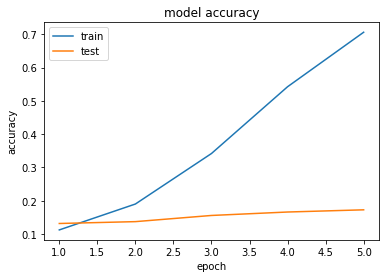

In [292]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'])
plt.plot(epochs, history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

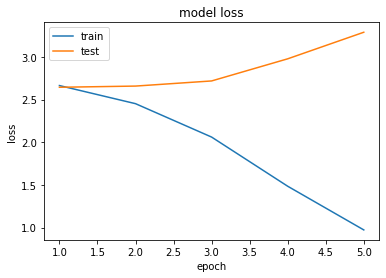

In [293]:
epochs = range(1, len(history.history['val_accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [294]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)

275/275 [==============================] - 53s 193ms/step - loss: 3.2905 - accuracy: 0.1727


# Harry Potter Data

In [295]:
import nltk
import numpy as np
import pandas as pd

from nltk import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

import re
import glob   

'''HP data Normalization and Stemming'''
# bag_of_words = {} #{등장인물 : 해당인물의 stemData, ~}
h_normalized_text = []
h_stemData = []

ps=PorterStemmer()
stop_words = set(stopwords.words('english'))
input_file = r'.\data\\test\\'

allHPfile_list = glob.glob(os.path.join(input_file, 'HP_*'))
print(allHPfile_list)

harryPotter={}
for file in allHPfile_list:
    df = pd.read_csv(file, sep=',', encoding='iso-8859-1')
    harryPotter[df['Character'][0]] = df['Sentence'].ravel()

print("stemming 시작")
for element in harryPotter.keys():
    h_normalized_text = []
    h_stemData = []
    for sentence in harryPotter[element]:
        h_clean_sentence = re.sub('[^A-Za-z\s]+', '', sentence.lower())
        h_normalized_text.append(h_clean_sentence)
    for sentence in h_normalized_text:
        tokenData = nltk.word_tokenize(sentence)
        for word in tokenData:
            if word not in stop_words:
                h_stemData.append(ps.stem(word))
    harryPotter[element] = h_stemData
    print(harryPotter[element])

print("stemming 완료")

['.\\data\\\\test\\HP_DUMBLEDORE.csv', '.\\data\\\\test\\HP_HAGRID.csv', '.\\data\\\\test\\HP_HARRY.csv', '.\\data\\\\test\\HP_HERMIONE.csv', '.\\data\\\\test\\HP_RON.csv']
stemming 시작
['shouldv', 'known', 'would', 'professor', 'mcgonagal', 'im', 'afraid', 'professor', 'good', 'bad', 'hagrid', 'bring', 'ah', 'professor', 'would', 'trust', 'hagrid', 'life', 'problem', 'trust', 'hagrid', 'albu', 'realli', 'think', 'safe', 'leav', 'peopl', 'famili', 'exactli', 'he', 'far', 'better', 'grow', 'away', 'he', 'readi', 'hagrid', 'realli', 'goodby', 'good', 'luckharri', 'potter', 'startofterm', 'notic', 'wish', 'announc', 'first', 'year', 'pleas', 'note', 'dark', 'forest', 'strictli', 'forbidden', 'student', 'also', 'caretak', 'mr', 'filch', 'ask', 'remind', 'thirdfloor', 'corridor', 'right', 'hand', 'side', 'bound', 'everyon', 'wish', 'die', 'pain', 'death', 'thank', 'let', 'feast', 'begin', 'sillllleeennnnceeee', 'everyon', 'pleas', 'panic', 'prefect', 'lead', 'hous', 'back', 'dormitori', 'tea

In [296]:
'''HP data padding'''


hx_stemData = []
hy=[]

for element in harryPotter.keys():
    hx_stemData.append(harryPotter[element])
    hy.append(element)
    
max_features = 35000

tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(hx_stemData)
HX = tokenizer.texts_to_sequences(hx_stemData)

max_seq_length = np.max([len(text) for text in hx_stemData])
print(max_seq_length)
HX = pad_sequences(HX)

print(nb_features)
print(HX.shape)
print(HX)

HY_data = np.array(hy)
print(HY_data)



2127
10000
(5, 2127)
[[   0    0    0 ...    7   28  138]
 [   0    0    0 ...  373  101   12]
 [  50 1090 1091 ...  750  517  751]
 [   0    0    0 ...  507  370    1]
 [   0    0    0 ...  137   10    5]]
['DUMBLEDORE' 'HAGRID' 'HARRY' 'HERMIONE' 'RON']


In [301]:
 from keras.models import load_model

 model = load_model('.\data\\models\\LSTM_smote.h5')
 predicted_output = model.predict_classes(HX)
 print(predicted_output)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[ 7 11 11 15  9]
